# Import and settings

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

# Define functions

In [30]:
def make_dotplots_for_paper_combined(
    ad, genes, groupby,
    vmins=[0, 0, 0], vmaxs=[1.5, 1.5, 1.5], dot_maxs=[0.15, 0.75, 0.03], MOEs=[True, True, True],
    merge=False, title='', save=None, save_dpi=200, **kwargs
):
    n_gene = len(genes)
    assert len(genes) + 1 == len(vmins) == len(vmaxs) == len(dot_maxs)
        
    fig, ax = plt.subplots(ncols=n_gene + 1, gridspec_kw={'wspace': 0 if merge else 0.05})
    fW, fH = 0, 0
    for i, gene in enumerate(genes):
        w, h = ss.lib.dotplot2(
            ad, gene, groupby=groupby, mean_only_expressed=MOEs[i], swap_axis=True,
            color_map='cool', ax=ax[i], omit_xlab=True, omit_ylab=i>0,
            title='', vmin=vmins[i], vmax=vmaxs[i], dot_max=dot_maxs[i], **kwargs)
        if merge:
            if i < n_gene - 1:
                ax[i].spines['right'].set_visible(False)
            else:
                ax[i].spines['left'].set_visible(False)
        fW += w
        fH = max(fH, h)
    i += 1
    w,h = ss.lib.dotplot2(
        ad, genes, groupby=groupby, mean_only_expressed=MOEs[i], second_key_dependent_fraction=True,
        ax=ax[i], swap_axis=True,
        title=title, title_loc='right', color_map='cool', omit_xlab=True, omit_ylab=True,
        vmin=vmins[i], vmax=vmaxs[i], dot_max=dot_maxs[i], **kwargs)
    fW += w
    fH = max(fH, h)

    fig.set_figwidth(fW)
    fig.set_figheight(fH)
    if save:
        fig.savefig(save, bbox_inches='tight', dpi=save_dpi)
        plt.close()

# Processing

### popescu19

In [ ]:
raw_ad = sc.read('popescu19.h5ad')

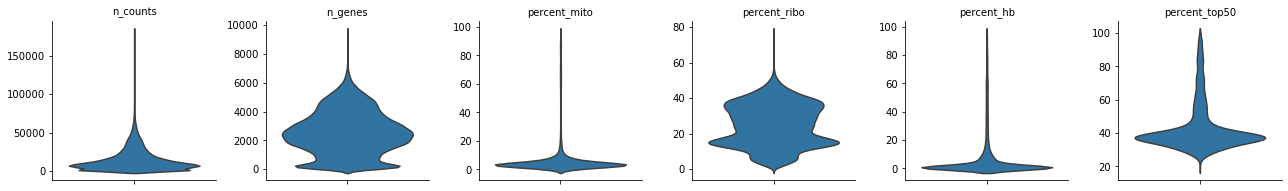

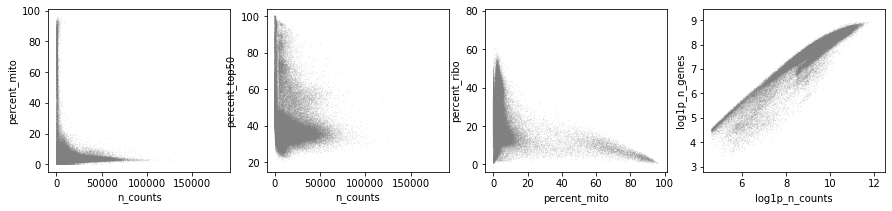

In [18]:
ss.lib.calculate_qc(raw_ad)
ss.lib.plot_qc(raw_ad)

In [20]:
ad = ss.lib.simple_default_pipeline(raw_ad, filter_kw={'metrics': ['n_counts', 'n_genes', 'percent_mito', 'percent_ribo']})

/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda/envs/scrna/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda/envs/scrna/lib

In [101]:
markers = [
    'HLA-DRA', 'CD34', 'SPINK2',
    'JCHAIN', 'IGLL1', 'CD79B', 'TCL1A', 'IGKC', 'MS4A1', 'CD19',
    'LTB', 'KLRB1', 'PTPRC', 'CD3E', 'CD7', 'IL32', 'CD8A', 'KLRD1', 'NKG7', 'XCL2', 'NCAM1',
    'MPO', 'LYZ', 'PLAC8', 'IL3RA', 'CLEC9A', 'CD1C',
    'S100A9', 'CCL4', 'CD14', 'FCGR3A', 'CD4', 'C1QA',
    'VCAM1', 'GYPA', 'SERPINB1', 'TPSAB1', 'KIT', 'PF4', 'ITGA2B',
    'GATA1', 'KLF1', 'ALAS2', 'HBA1', 'BPGM',
    'ESAM', 'ECM1', 'APOA1'
]

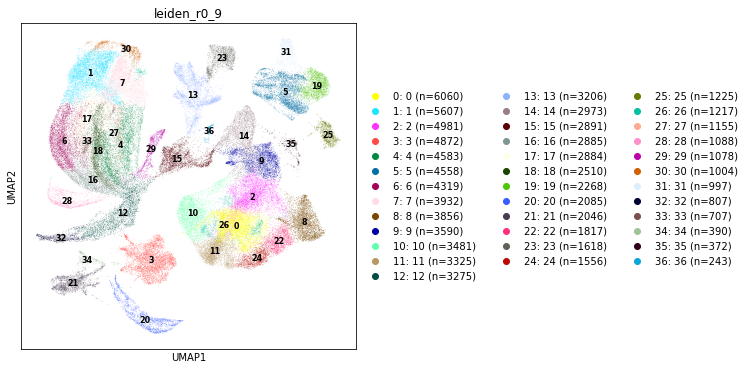

In [143]:
ss.lib.plot_embedding(ad, basis='umap', groupby='leiden_r0_9', figsize=(6, 6), alpha=0.5)

In [141]:
ss.lib.leiden(ad, use_graph='neighbors', restrict_to=('leiden_r0_9', ('15',)), resolution=0.1, key_added='split')
ss.lib.leiden(ad, use_graph='neighbors', restrict_to=('leiden_split', ('9',)), resolution=0.2, key_added='split1')
ss.lib.leiden(ad, use_graph='neighbors', restrict_to=('leiden_split1', ('14',)), resolution=0.2, key_added='split2')
ss.lib.leiden(ad, use_graph='neighbors', restrict_to=('leiden_split2', ('13',)), resolution=0.2, key_added='split3')

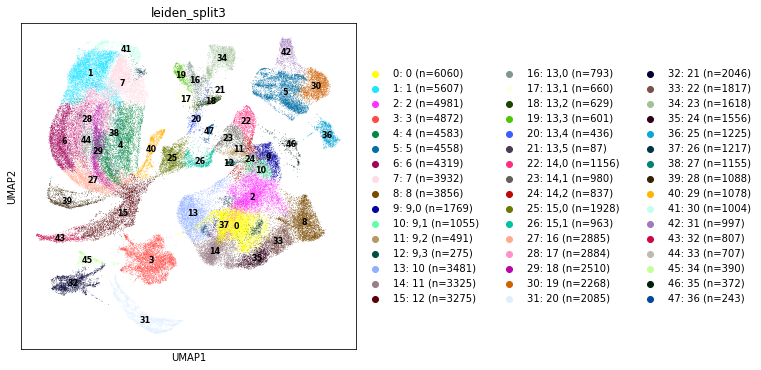

In [144]:
ss.lib.plot_embedding(ad, basis='umap', groupby='leiden_split3', figsize=(6, 6))

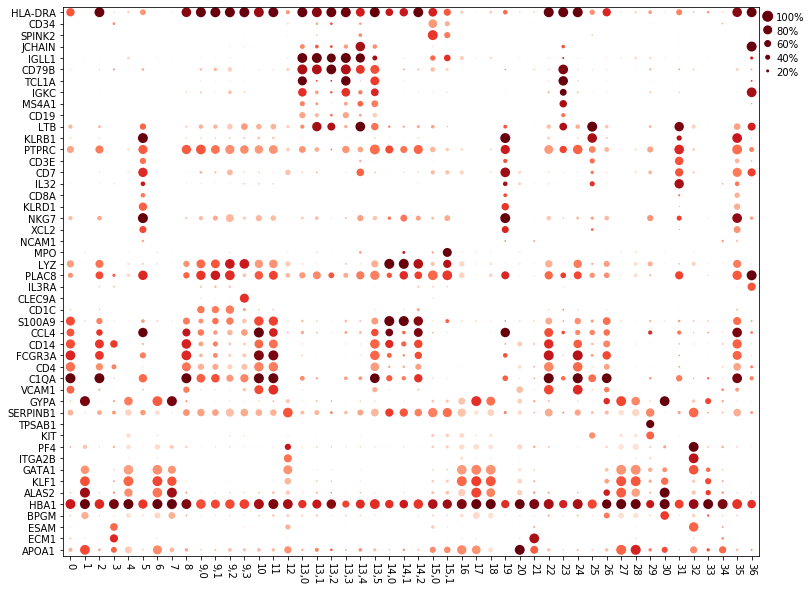

In [145]:
ss.lib.dotplot2(ad, markers[::-1], groupby='leiden_split3', vmax=3, mean_only_expressed=True)

In [146]:
ad.obs['Annot'] = ss.lib.regroup(ad, groupby='leiden_split3', regroups={
    'HSC/MPP': ['15,0'],
    'Pre pro-B cell': ['13,4'],
    'pro-B cell': ['13,1', '13,2'],
    'pre-B cell': ['13,0', '13,3'],
    'B cell': ['13,5', '23'],
    'ILC pre': ['25'],
    'Early L/TL': ['31'],
    'NK': ['5', '19'],
    'Neut-my pro': ['15,1'],
    'pDC pre': ['36'],
    'DC pre': ['9,2'],
    'DC1': ['9,3'],
    'DC2': ['9,0', '9,1'],
    'Mono pre': ['14,1'],
    'Monocyte': ['14,0', '14,2'],
    'Mono-mac': ['2', '35'],
    'Kupffer': ['0', '8', '10', '11', '22', '24'],
    'VCAM1+ EI mac': ['26'],
    'MEMP': ['12'],
    'Mast cell': ['29'],
    'Megakaryocyte': ['32'],
    'Early erythroid': ['16', '28'],
    'Mid erythroid': ['4', '6', '17', '18', '27', '33'],
    'Late erythroid': ['1', '7', '30'],
    'Endothelial': '3',
    'Fibroblast': ['21', '34'],
    'Hepatocyte': '20',
})

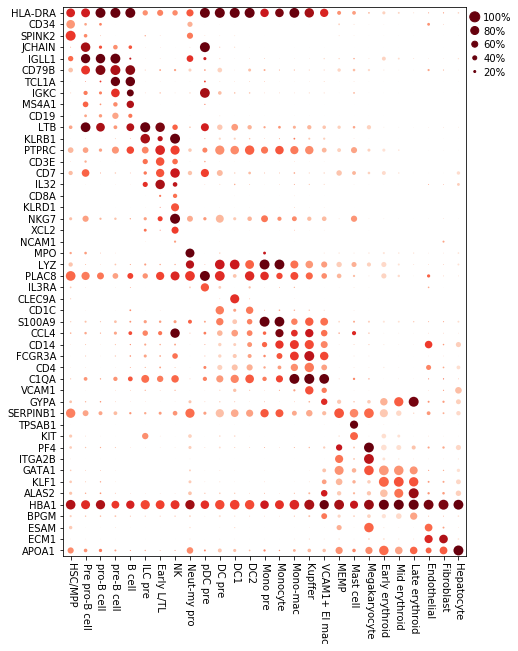

In [148]:
ss.lib.dotplot2(ad, markers[::-1], groupby='Annot', vmax=3, mean_only_expressed=True)

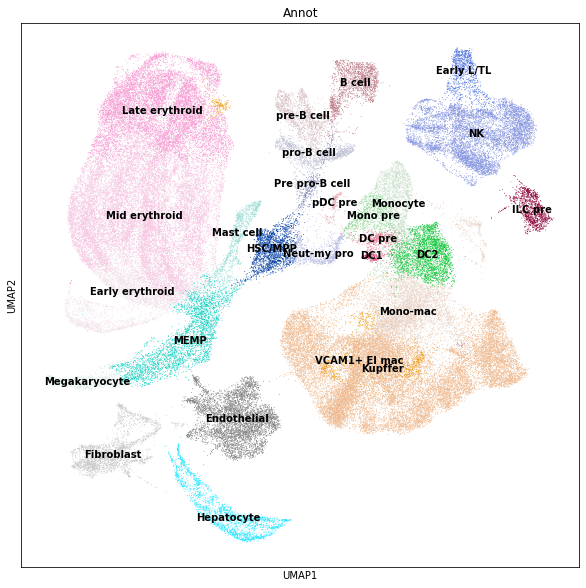

In [147]:
ss.lib.set_figsize((10,10))
ss.lib.clear_colors(ad)
ss.lib.plot_scatter(ad, basis='umap', color='Annot', size=3, legend_loc='on data')

In [36]:
ad.obs['Source'] = ad.obs.Other.str.rpartition('_')[2].values
ad.obs['Source'] = ad.obs['Source'].astype('category')

In [153]:
for k in list(ad.obs.keys()):
    if k not in ('Other', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50',
                 'leiden_r0_9', 'Source', 'leiden_split3', 'Annot'):
        del ad.obs[k]

In [161]:
ad.X = ad.raw.X
ad.raw = None

In [167]:
ss.lib.clear_colors(ad)

In [169]:
del ad.obsm['X_pca_hm'], ad.obsm['X_umap_hm']

In [171]:
del ad.uns['neighbors_hm'], ad.uns['neighbors'], ad.uns['pca'], ad.uns['leiden']

In [172]:
ad

AnnData object with n_obs × n_vars = 95461 × 26349 
    obs: 'batch', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'leiden_r0_9', 'Source', 'Annot', 'leiden_split3', 'BroadCellType'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'n_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

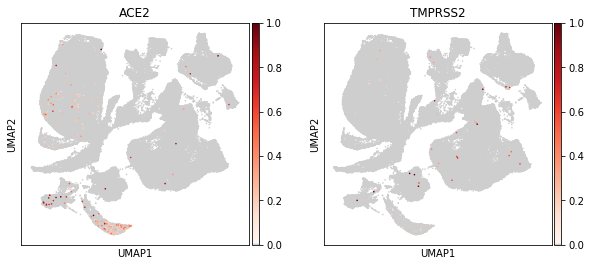

In [29]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_scatter(ad, basis='umap', color=['ACE2', 'TMPRSS2'], color_map=expr_cmap, size=10, vmax=1)

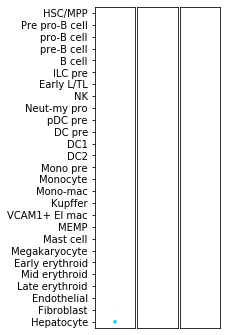

In [164]:
make_dotplots_for_paper_combined(ad, ['ACE2', 'TMPRSS2'], groupby='Annot', min_presence=5)

In [165]:
ad.obs['BroadCellType'] = ss.lib.regroup(ad, groupby='Annot', regroups={
    'immune cells': ['HSC/MPP', 'Pre pro-B cell', 'pro-B cell', 'pre-B cell', 'B cell',
                     'ILC pre', 'Early L/TL', 'NK', 'Neut-my pro',
                     'pDC pre', 'DC pre', 'DC1', 'DC2',
                     'Mono pre', 'Monocyte', 'Mono-mac', 'Kupffer', 'VCAM1+ EI mac',
                     'MEMP', 'Mast cell', 'Megakaryocyte'],
    'Erythroid': ['Early erythroid', 'Mid erythroid', 'Late erythroid'],
})

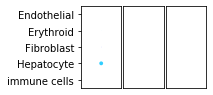

In [166]:
make_dotplots_for_paper_combined(ad, ['ACE2', 'TMPRSS2'], groupby='BroadCellType', min_presence=5)